# Demand forecasting in the supply chain (Machine Learning)

### objective:  There are 10 different stores and 50 distinct item in each. We want to forecast a number for each distinct 50 items that tell us how many each item will be sold on each day for 2 months period in every 10 stores (2017-11-01 and 2017-12-31).

## Step 1:Data loading and Exploration

In [59]:
import pandas as pd
import numpy as np

In [60]:
df=pd.read_csv(r"C:\Users\ATHIRA S\Downloads\demand-forecasting-kernels-only\train.csv",parse_dates=['date'])


In [61]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [62]:
df.shape

(913000, 4)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


### Features
- date - Date of the sale data. There are no holiday effects or store closures.

- store - Store ID

- item - Item ID

- sales - Number of items sold at a particular store on a particular date



In [64]:
df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [65]:
df.duplicated().sum()

0

In [66]:
print("Min Date:", df['date'].min())
print("Max Date:", df['date'].max())


Min Date: 2013-01-01 00:00:00
Max Date: 2017-12-31 00:00:00


In [67]:
df_store=df.store.nunique()
df_item=df.item.nunique()
print(f'no  of stores in data = {df_store}')
print(f'no  of items in data = {df_item}')

no  of stores in data = 10
no  of items in data = 50


In [68]:
unique_items_per_store=df.groupby(['store'])['item'].nunique()
print(f'Total number unique items per each store:\n{unique_items_per_store}')

Total number unique items per each store:
store
1     50
2     50
3     50
4     50
5     50
6     50
7     50
8     50
9     50
10    50
Name: item, dtype: int64


In [69]:
df.groupby(['store']).agg({'sales':['count','sum','mean','median','std','min','max']})

sales                                               
       count      sum       mean median        std min  max
store                                                      
1      91300  4315603  47.268379   44.0  24.006252   1  155
2      91300  6120128  67.033165   62.0  33.595810   3  231
3      91300  5435144  59.530602   55.0  29.974102   3  196
4      91300  5012639  54.902946   51.0  27.733097   4  186
5      91300  3631016  39.770164   37.0  20.365757   2  130
6      91300  3627670  39.733516   37.0  20.310451   0  134
7      91300  3320009  36.363735   34.0  18.684825   1  122
8      91300  5856169  64.142048   60.0  32.231751   4  204
9      91300  5025976  55.049025   51.0  27.832186   4  195
10     91300  5360158  58.709288   54.0  29.554994   3  187

In [70]:
df.groupby(['item']).agg({'sales':['count','sum','mean','median','std','min','max']})

sales                                               
      count      sum       mean median        std min  max
item                                                      
1     18260   401384  21.981599   21.0   8.468922   1   59
2     18260  1069564  58.574151   56.0  20.093015   9  150
3     18260   669087  36.642223   35.0  13.179441   7  104
4     18260   401907  22.010241   21.0   8.403898   0   66
5     18260   335230  18.358708   18.0   7.265167   1   50
6     18260  1068281  58.503888   56.0  20.174898  11  148
7     18260  1068777  58.531051   56.0  20.146002  11  141
8     18260  1405108  76.950055   74.0  26.130697  15  181
9     18260   938379  51.389869   49.5  17.790158   6  134
10    18260  1337133  73.227437   70.0  24.823725  14  175
11    18260  1271925  69.656353   67.0  23.744732  11  170
12    18260  1271534  69.634940   67.0  23.738663  12  170
13    18260  1539621  84.316594   81.0  28.311031  20  210
14    18260  1071531  58.681873   56.0  20.079860  12  152
15    18260  1607442  88.030778   85.0  29.522852  17  231
16    18260   468480  25.656079   25.0   9.603270   2   70
17    18260   602486  32.994852   32.0  11.967610   4   83
18    18260  1538876  84.275794   81.0  28.430621  18  208
19    18260   736892  40.355531   39.0  14.332645   5   99
20    18260   867641  47.515936   46.0  16.490487   9  127
21    18260   736190  40.317087   39.0  14.338006   7  109
22    18260  1469971  80.502245   78.0  27.118163  14  214
23    18260   534979  29.297864   28.0  10.819549   3   81
24    18260  1205975  66.044633   64.0  22.531555  14  156
25    18260  1473334  80.686418   78.0  27.238817  18  193
26    18260   869981  47.644085   46.0  16.723912   8  119
27    18260   402628  22.049726   21.0   8.461641   1   59
28    18260  1604713  87.881325   85.0  29.501781  16  206
29    18260  1271240  69.618839   67.0  23.635631  15  173
30    18260   736554  40.337021   39.0  14.363331   5  115
31    18260  1070845  58.644304   57.0  20.104705  10  159
32    18260   803107  43.981763   42.0  15.574556   5  119
33    18260  1270183  69.560953   67.0  23.718343  15  169
34    18260   469935  25.735761   25.0   9.617910   2   79
35    18260  1201541  65.801807   63.0  22.461990  12  168
36    18260  1406548  77.028916   74.0  26.067440  16  188
37    18260   534258  29.258379   28.0  10.771547   3   74
38    18260  1470330  80.521906   77.0  27.141799  15  188
39    18260   801311  43.883406   42.0  15.511550   7  112
40    18260   534094  29.249398   28.0  10.822959   3   74
41    18260   401759  22.002136   21.0   8.402470   2   60
42    18260   669925  36.688116   35.0  13.215112   5   96
43    18260   936635  51.294359   49.0  17.801008   9  126
44    18260   536811  29.398193   28.0  10.797738   3   78
45    18260  1471467  80.584173   78.0  27.318402  18  205
46    18260  1070764  58.639869   56.0  20.220879  11  150
47    18260   401781  22.003341   21.0   8.420102   2   61
48    18260   937703  51.352848   49.0  17.881917   8  130
49    18260   535663  29.335323   28.0  10.874788   3   77
50    18260  1203009  65.882202   63.0  22.416031  12  164

## Step 2:  Exploratory Data Analysis (EDA)

In [71]:
import matplotlib.pyplot as plt 
import seaborn as sns

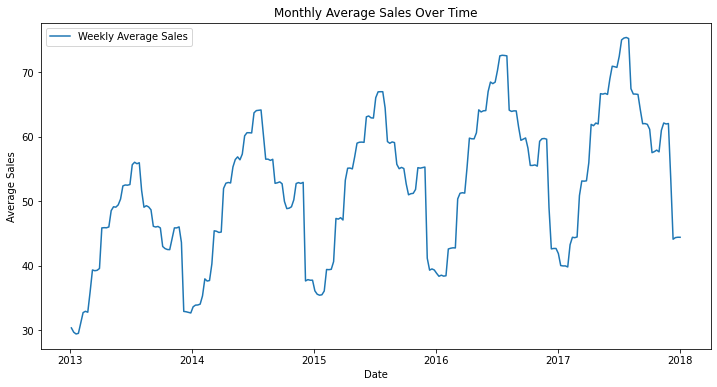

In [314]:
df['your_date_column'] = pd.to_datetime(df['date'])
df.set_index('date',inplace=True)
y=df['sales'].resample('W').mean()
plt.figure(figsize=(12, 6))
plt.plot(y, label='Weekly Average Sales')
plt.title('Monthly Average Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.legend()
plt.show()


- There is an increasing trend with seasonality.

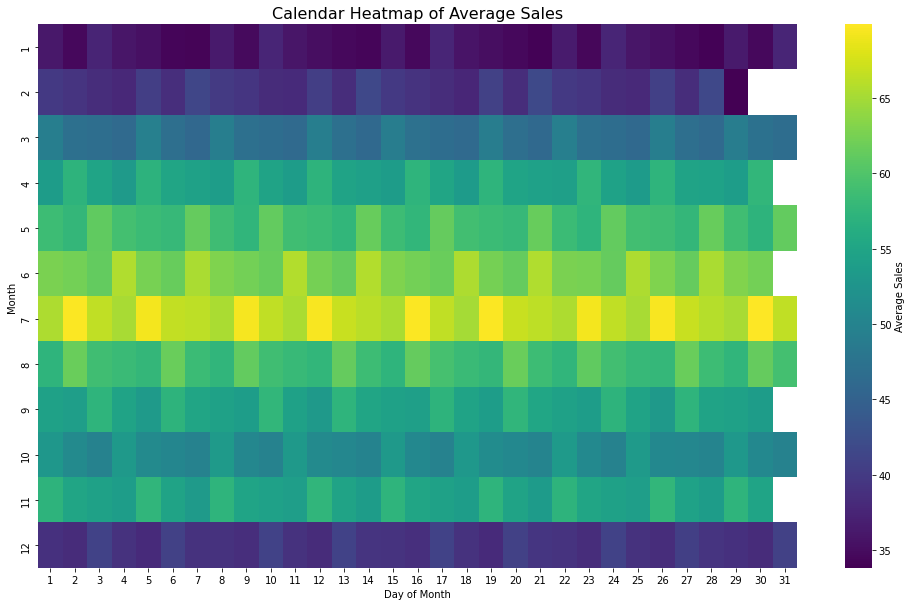

In [297]:
calendar_heatmap_data = df.groupby([df.index.month, df.index.day])['sales'].mean().unstack()
plt.figure(figsize=(17,10))
sns.heatmap(calendar_heatmap_data, cmap='viridis', cbar_kws={'label': 'Average Sales'})
plt.title('Calendar Heatmap of Average Sales',fontsize=16)
plt.xlabel('Day of Month')
plt.ylabel('Month')
plt.show()


- 7th month (July) had higher average sales compared to other months.
- In Jan and Dec there is a lower average sales.

## Step 3:Feature Engineering

In [72]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['day_of_year']=df['date'].dt.dayofyear
df['weekday'] = df['date'].dt.weekday
df['is_weekend']=df['date'].dt.weekday//4
df['is month start']=df['date'].dt.is_month_start.astype(int)
df['is month end']=df['date'].dt.is_month_end.astype(int)

In [73]:
df.head()

,date,store,item,sales,day,month,year,day_of_year,weekday,is_weekend,is month start,is month end
0,2013-01-01,1,1,13,1,1,2013,1,1,0,1,0
1,2013-01-02,1,1,11,2,1,2013,2,2,0,0,0
2,2013-01-03,1,1,14,3,1,2013,3,3,0,0,0
3,2013-01-04,1,1,13,4,1,2013,4,4,1,0,0
4,2013-01-05,1,1,10,5,1,2013,5,5,1,0,0


### Lag Features

In [74]:
def random_noise(length):
    return np.random.normal(scale=1.6, size=length)

In [75]:
def lag_features(df, lags_list):
    for lag in lags_list:
        lag_column = 'sales_lag_' + str(lag)
        df[lag_column] = df.groupby(['store', 'item'])['sales'].transform(
            lambda x: x.shift(lag) + random_noise(len(x))
        )
    return df


In [76]:
lags_list = [91, 98, 105, 112, 119, 126, 182, 364, 546, 728]
df=lag_features(df, lags_list)

In [77]:
df.head()

,date,store,item,sales,day,month,year,day_of_year,weekday,is_weekend,...,sales_lag_91,sales_lag_98,sales_lag_105,sales_lag_112,sales_lag_119,sales_lag_126,sales_lag_182,sales_lag_364,sales_lag_546,sales_lag_728
0,2013-01-01,1,1,13,1,1,2013,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,1,1,11,2,1,2013,2,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-03,1,1,14,3,1,2013,3,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-04,1,1,13,4,1,2013,4,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-05,1,1,10,5,1,2013,5,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
df.tail()

,date,store,item,sales,day,month,year,day_of_year,weekday,is_weekend,...,sales_lag_91,sales_lag_98,sales_lag_105,sales_lag_112,sales_lag_119,sales_lag_126,sales_lag_182,sales_lag_364,sales_lag_546,sales_lag_728
912995,2017-12-27,10,50,63,27,12,2017,361,2,0,...,78.888728,70.611511,83.174678,76.965784,80.786051,105.478227,92.535370,45.395731,78.528805,50.771102
912996,2017-12-28,10,50,59,28,12,2017,362,3,0,...,82.000112,88.583580,88.738877,78.119014,89.303318,86.178076,126.453046,66.587380,93.618354,44.463697
912997,2017-12-29,10,50,74,29,12,2017,363,4,1,...,91.865231,96.961533,94.277178,98.743064,95.188818,97.983431,112.153903,66.391932,100.282577,58.841838
912998,2017-12-30,10,50,62,30,12,2017,364,5,1,...,104.223068,100.022653,94.792598,91.608682,93.600059,89.246382,117.142664,61.909531,110.733065,62.787592
912999,2017-12-31,10,50,82,31,12,2017,365,6,1,...,103.701579,96.940812,108.551324,96.967291,100.268078,113.983954,119.531459,69.174891,123.446592,82.659983


### Rolling Mean Feature

In [79]:
def rolling_mean(df, windows):
    for window in windows:
        df['sales_roll_mean_' + str(window)] = df.groupby(['store', 'item'])['sales'].transform(
            lambda x: x.shift(1).rolling(window=window, min_periods=10).mean() + random_noise(len(x))
        )
    return df


In [80]:
windows_list=[365,564]

In [81]:
df=rolling_mean(df,windows_list)

In [82]:
df.head()

,date,store,item,sales,day,month,year,day_of_year,weekday,is_weekend,...,sales_lag_105,sales_lag_112,sales_lag_119,sales_lag_126,sales_lag_182,sales_lag_364,sales_lag_546,sales_lag_728,sales_roll_mean_365,sales_roll_mean_564
0,2013-01-01,1,1,13,1,1,2013,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,1,1,11,2,1,2013,2,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-03,1,1,14,3,1,2013,3,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-04,1,1,13,4,1,2013,4,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-05,1,1,10,5,1,2013,5,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
df.tail()

,date,store,item,sales,day,month,year,day_of_year,weekday,is_weekend,...,sales_lag_105,sales_lag_112,sales_lag_119,sales_lag_126,sales_lag_182,sales_lag_364,sales_lag_546,sales_lag_728,sales_roll_mean_365,sales_roll_mean_564
912995,2017-12-27,10,50,63,27,12,2017,361,2,0,...,83.174678,76.965784,80.786051,105.478227,92.535370,45.395731,78.528805,50.771102,82.251995,81.943245
912996,2017-12-28,10,50,59,28,12,2017,362,3,0,...,88.738877,78.119014,89.303318,86.178076,126.453046,66.587380,93.618354,44.463697,82.384361,86.657930
912997,2017-12-29,10,50,74,29,12,2017,363,4,1,...,94.277178,98.743064,95.188818,97.983431,112.153903,66.391932,100.282577,58.841838,86.864662,86.504115
912998,2017-12-30,10,50,62,30,12,2017,364,5,1,...,94.792598,91.608682,93.600059,89.246382,117.142664,61.909531,110.733065,62.787592,86.389080,84.014423
912999,2017-12-31,10,50,82,31,12,2017,365,6,1,...,108.551324,96.967291,100.268078,113.983954,119.531459,69.174891,123.446592,82.659983,85.422448,82.839570


## Step 4:Train-Test Split

In [84]:
train = df[df['date'] < '2017-11-01']
test= df[(df['date'] >= '2017-11-01') & (df['date'] < '2018-01-01')]


## Step 5: Feature scaling and model training

In [85]:
train.columns

Index(['date', 'store', 'item', 'sales', 'day', 'month', 'year', 'day_of_year',
       'weekday', 'is_weekend', 'is month start', 'is month end',
       'sales_lag_91', 'sales_lag_98', 'sales_lag_105', 'sales_lag_112',
       'sales_lag_119', 'sales_lag_126', 'sales_lag_182', 'sales_lag_364',
       'sales_lag_546', 'sales_lag_728', 'sales_roll_mean_365',
       'sales_roll_mean_564'],
      dtype='object')

In [86]:
df = pd.get_dummies(df, columns=['day', 'month', 'year', 'day_of_year',
       'weekday', 'is_weekend', 'is month start', 'is month end'])

In [87]:
X_train=train.drop(columns=['sales','date'])

In [88]:
X_train.head()

,store,item,day,month,year,day_of_year,weekday,is_weekend,is month start,is month end,...,sales_lag_105,sales_lag_112,sales_lag_119,sales_lag_126,sales_lag_182,sales_lag_364,sales_lag_546,sales_lag_728,sales_roll_mean_365,sales_roll_mean_564
0,1,1,1,1,2013,1,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2,1,2013,2,2,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,3,1,2013,3,3,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,4,1,2013,4,4,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,5,1,2013,5,5,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
y_train=train['sales']

In [90]:
X_train.shape

(882500, 22)

In [91]:
y_train.shape

(882500,)

In [92]:
from xgboost import XGBRegressor

In [93]:
model=XGBRegressor()

In [94]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Step 6: Models Prediction


In [95]:
X_test=test.drop(columns=['sales','date'])

In [96]:
X_test.shape

(30500, 22)

In [97]:
y_test=test[['date','store','item','sales']]

In [98]:
predictions = model.predict(X_test)


In [99]:
predictions

array([21.737123, 23.563988, 25.366865, ..., 71.19725 , 73.45117 ,
       74.77104 ], dtype=float32)

In [100]:
predictions.shape

(30500,)

In [109]:
forecast_df=pd.DataFrame({'Predictions':predictions})
forecast_df

,Predictions
0,21.737123
1,23.563988
2,25.366865
3,27.751162
4,27.195990
...,...
30495,57.210739
30496,66.914719
30497,71.197250
30498,73.451172


In [110]:
forecast_compare_df = pd.concat([y_test.reset_index(drop=True), forecast_df.reset_index(drop=True)], axis=1)
forecast_compare_df = forecast_compare_df.round(1)
forecast_compare_df


,date,store,item,sales,Predictions
0,2017-11-01,1,1,16,21.700001
1,2017-11-02,1,1,21,23.600000
2,2017-11-03,1,1,18,25.400000
3,2017-11-04,1,1,34,27.799999
4,2017-11-05,1,1,23,27.200001
...,...,...,...,...,...
30495,2017-12-27,10,50,63,57.200001
30496,2017-12-28,10,50,59,66.900002
30497,2017-12-29,10,50,74,71.199997
30498,2017-12-30,10,50,62,73.500000


In [111]:
forecast_compare_df_numpy=forecast_compare_df.to_numpy()

In [112]:
forecast_compare_df_numpy

array([[Timestamp('2017-11-01 00:00:00'), 1, 1, 16, 21.700000762939453],
       [Timestamp('2017-11-02 00:00:00'), 1, 1, 21, 23.600000381469727],
       [Timestamp('2017-11-03 00:00:00'), 1, 1, 18, 25.399999618530273],
       ...,
       [Timestamp('2017-12-29 00:00:00'), 10, 50, 74, 71.19999694824219],
       [Timestamp('2017-12-30 00:00:00'), 10, 50, 62, 73.5],
       [Timestamp('2017-12-31 00:00:00'), 10, 50, 82, 74.80000305175781]],
      dtype=object)

## Item 1 Sales vs Prediction plot

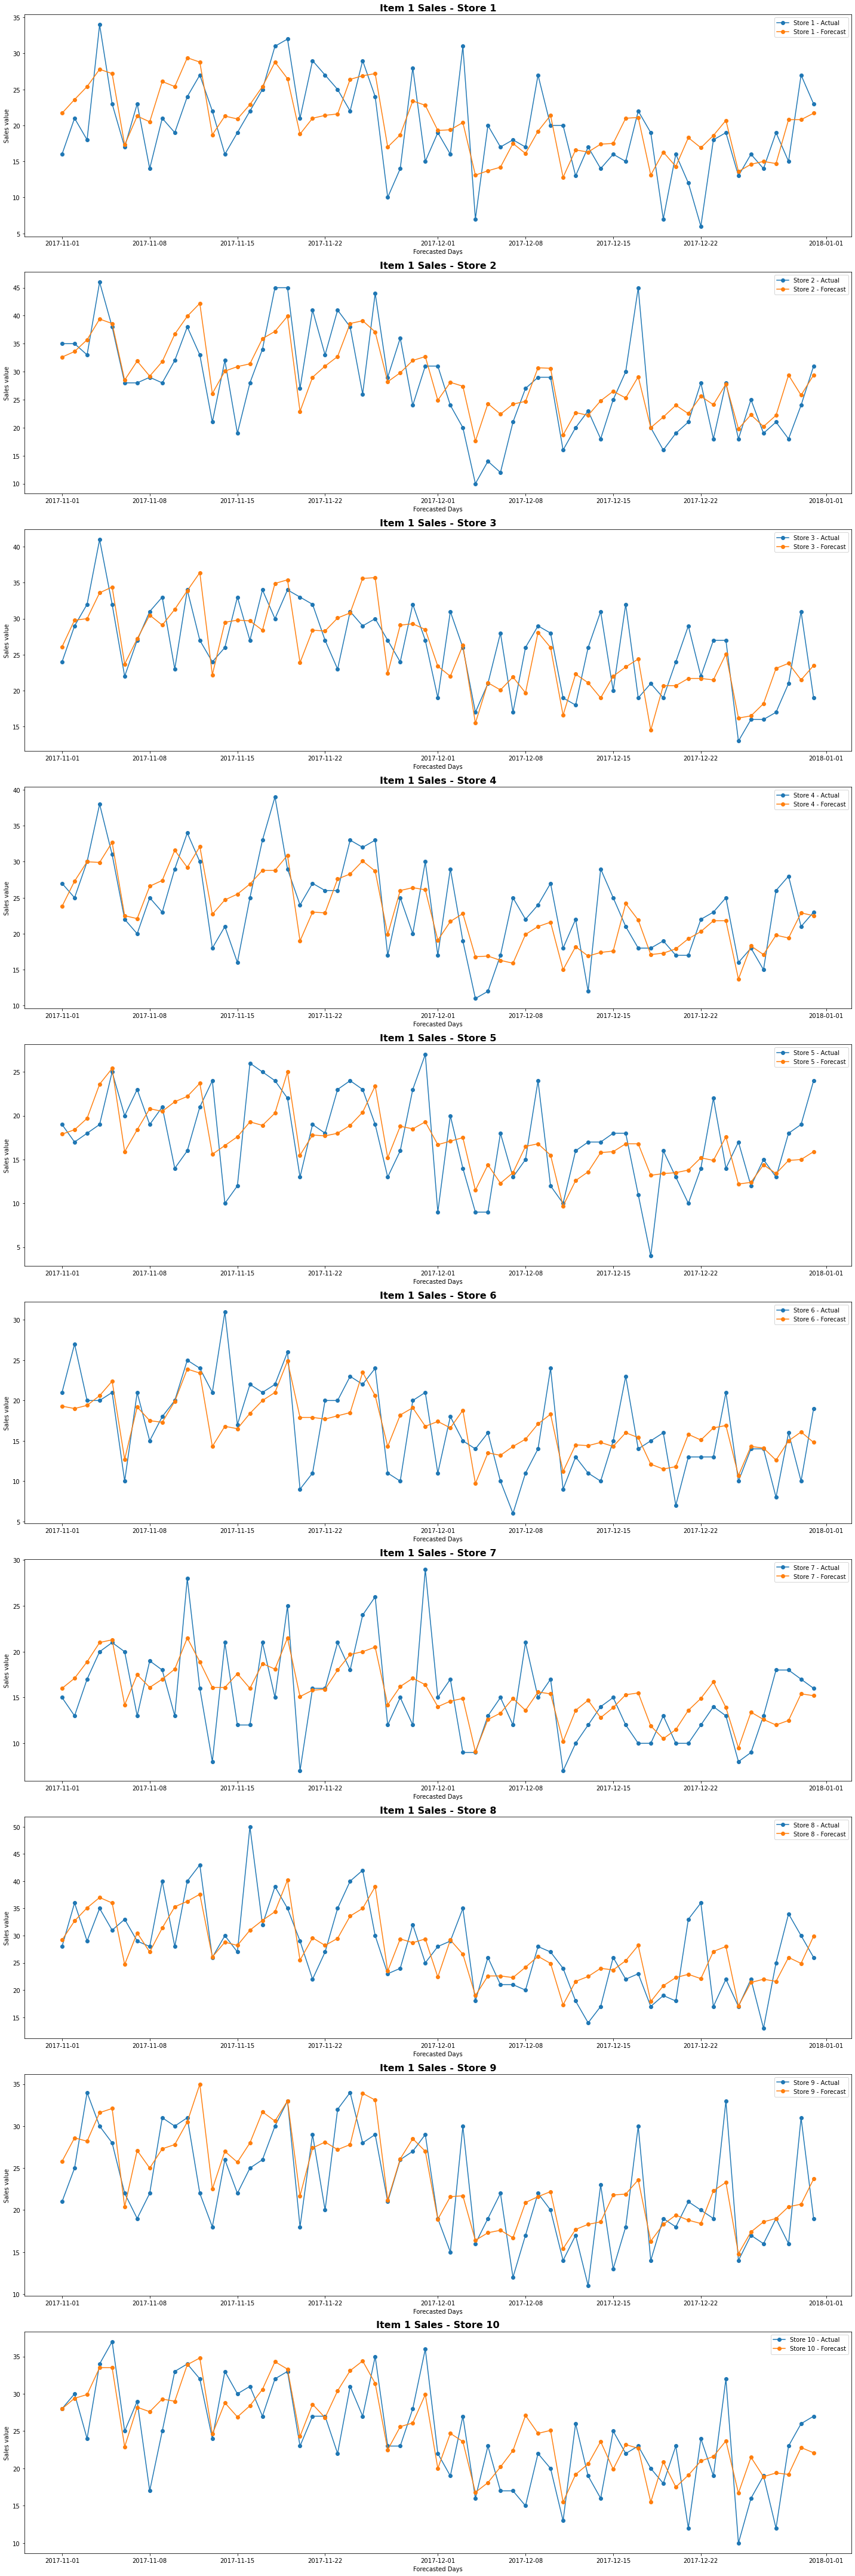

In [113]:
item_data_item1 = forecast_compare_df_numpy[forecast_compare_df_numpy[:, 2] == 1]
unique_stores_item1 = np.unique(item_data_item1[:, 1])
num_subplots = len(unique_stores_item1)
fig, axes = plt.subplots(nrows=num_subplots, ncols=1, figsize=(20, 6 * num_subplots))

for i, store in enumerate(unique_stores_item1):
    store_data_item1 = item_data_item1[item_data_item1[:, 1] == store]
    axes[i].plot(store_data_item1[:, 0], store_data_item1[:, 3], label=f'Store {store} - Actual', marker='o')
    axes[i].plot(store_data_item1[:, 0], store_data_item1[:, 4], label=f'Store {store} - Forecast', marker='o')
    axes[i].set_xlabel('Forecasted Days')
    axes[i].set_ylabel('Sales value')
    axes[i].set_title(f'Item 1 Sales - Store {store}', weight='bold', fontsize=16)
    axes[i].legend()
plt.tight_layout()
plt.show()

## Step 7: Model's Performance Analysis

In [114]:
def mape(actual,forecast):
    actual,forecast=np.array(actual),np.array(forecast)
    errors = np.abs((actual - forecast) / actual)
    mape = np.mean(errors) * 100
    return mape

In [115]:
mape_value =mape(forecast_compare_df['sales'], forecast_compare_df['Predictions'])
print(f"MAPE: {mape_value:.2f}%")

MAPE: 13.54%
